In this project we will utilize artificial neural network approach for predicting the chances of patients to have diabetes.
The dataset comprises patients' IDs and some medical criteria like pregnancy,  blood plasma glucose level, blood pressure, triceps thickness, etc. Diabetic patients are marked with 1, and non-diabetic with 0, which is a classical binary classification problem.

# First, let's install some of the required libraries.


In [ ]:
pip install pandas


In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Importing some of the libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('max_seq_item', None)
pd.set_option('display.width', 1000)

# Importing the file:

In [ ]:
!wget https://raw.githubusercontent.com/dmy-collab/shared-projects/main/neural_network_predicting_diabetes/diabetes.csv

--2021-08-03 21:36:01--  https://raw.githubusercontent.com/dmy-collab/shared-projects/main/neural_network_predicting_diabetes/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>] 758.22K  --.-KB/s    in 0.02s   

2021-08-03 21:36:01 (40.9 MB/s) - ‘diabetes.csv.1’ saved [776415/776415]



# Initial analysis:

In [2]:
dataset = pd.read_csv('diabetes.csv')
print(dataset.shape)
print(dataset.describe())
dataset['Diabetic'].value_counts()
nulls = dataset.isnull().sum().to_frame()   # searching for missing values
for index, row in nulls.iterrows():
    print(index, row[0])

(15000, 10)
          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  SerumInsulin           BMI  DiabetesPedigree           Age      Diabetic
count  1.500000e+04  15000.000000   15000.000000            15000.000000      15000.000000  15000.000000  15000.000000      15000.000000  15000.000000  15000.000000
mean   1.502922e+06      3.224533     107.856867               71.220667         28.814000    137.852133     31.509646          0.398968     30.137733      0.333333
std    2.892534e+05      3.391020      31.981975               16.758716         14.555716    133.068252      9.759000          0.377944     12.089703      0.471420
min    1.000038e+06      0.000000      44.000000               24.000000          7.000000     14.000000     18.200512          0.078044     21.000000      0.000000
25%    1.252866e+06      0.000000      84.000000               58.000000         15.000000     39.000000     21.259887          0.137743     22.000000      0.00000

# Splitting the dataset on features and labels:

In [3]:
X = dataset.iloc[:, 1:-1].values    # features
y = dataset.iloc[:, -1].values      # labels

# Data scaling:

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)
X = X_norm



> **Splitting the dataset into the Training set and Test set:**



In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=101)

# Training the artificial neural network (ANN) model and evaluation:

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(8,))) # N=8 - from number of features
model.add(Dropout(0.5))     # minimizing overfitting with dropout layer

model.add(Dense(units=5, activation='relu'))  # # (N of features + N of output)/2
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

# Choosing an optimizer and loss (in case of this dataset - for a binary classification problem):

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(f"\n\tModel summary: \n{model.summary()}")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________

	Model summary: 
None


# Adding early stopping as an anti-overfitting approach:

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Training the model:

In [9]:
model.fit(x=X_train,
          y=y_train,
          epochs=400,
          batch_size=64,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]) # preventing overfitting


Epoch 1/400
176/176 [==============================] - 1s 3ms/step - loss: 0.7390 - accuracy: 0.5781 - val_loss: 0.6319 - val_accuracy: 0.7264
Epoch 2/400
176/176 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.6766 - val_loss: 0.5620 - val_accuracy: 0.7173
Epoch 3/400
176/176 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.6928 - val_loss: 0.5239 - val_accuracy: 0.7408
Epoch 4/400
176/176 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7062 - val_loss: 0.4929 - val_accuracy: 0.7635
Epoch 5/400
176/176 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7202 - val_loss: 0.4747 - val_accuracy: 0.7755
Epoch 6/400
176/176 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7308 - val_loss: 0.4632 - val_accuracy: 0.7861
Epoch 7/400
176/176 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7337 - val_loss: 0.4536 - val_accuracy: 0.7885

# Evaluation of overfitting:

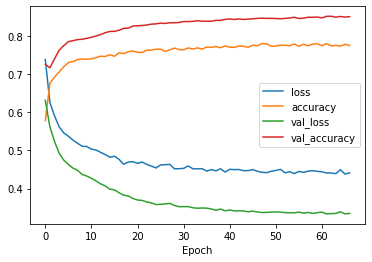

In [10]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_xlabel('Epoch')
plt.show()

# Model evaluation:

In [11]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(f"\n\tConfusion  matrix: \n{confusion_matrix(y_test, predictions)}")
print(f"\n\tClassification report: \n{classification_report(y_test, predictions)}")


	Confusion  matrix: 
[[2337  184]
 [ 372  857]]

	Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2521
           1       0.82      0.70      0.76      1229

    accuracy                           0.85      3750
   macro avg       0.84      0.81      0.82      3750
weighted avg       0.85      0.85      0.85      3750



# With this method, we were able to achieve 85% accuracy in classification modeling with 82% recall for diabetic (1) class. Let's try it in action with the new instance:



In [12]:
new_data = dataset.iloc[50, 1:-1].values
new_predicted = model.predict(sc.transform([new_data]))
print(f"\n\tPredicted New instance: \n{new_predicted}")


	Predicted New instance: 
[[0.47867763]]


The output confirms that the model is working and predicts with 48% chance that the person has diabetes.